<a href="https://colab.research.google.com/github/karankumarsharma314-lab/Machine_Learning_Project/blob/main/Fraud_Detection_Project_Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Upload the dataset
df = pd.read_csv("fraud_detection_bigdata.csv")

In [4]:
# check first three Row
df.head(3)

,Transaction_ID,Transaction_Amount,Transaction_Time,Customer_Age,Account_Balance,Transaction_Type,Location_Match,Previous_Fraud,Fraud
0,1,938.54,32520.0,40.0,51846.30,POS,1.0,1.0,0.0
1,2,6020.24,56675.0,54.0,27060.47,Online,1.0,0.0,0.0
2,3,2633.49,43845.0,51.0,48057.02,POS,1.0,0.0,0.0


In [5]:
# check columns name
df.columns

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Time',
       'Customer_Age', 'Account_Balance', 'Transaction_Type', 'Location_Match',
       'Previous_Fraud', 'Fraud'],
      dtype='object')

In [6]:
# Check Total Row and Columns
df.shape

(24671, 9)

In [7]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24671 entries, 0 to 24670
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      24671 non-null  int64  
 1   Transaction_Amount  24671 non-null  float64
 2   Transaction_Time    24670 non-null  float64
 3   Customer_Age        24670 non-null  float64
 4   Account_Balance     24670 non-null  float64
 5   Transaction_Type    24670 non-null  object 
 6   Location_Match      24670 non-null  float64
 7   Previous_Fraud      24670 non-null  float64
 8   Fraud               24670 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
# statistical summary
df.describe()

,Transaction_ID,Transaction_Amount,Transaction_Time,Customer_Age,Account_Balance,Location_Match,Previous_Fraud,Fraud
count,24671.000000,24671.000000,24670.000000,24670.000000,24670.000000,24670.000000,24670.000000,24670.000000
mean,12336.000000,2008.522493,43195.456749,43.414147,49721.524205,0.797325,0.049696,0.020592
std,7122.048582,2002.932545,24810.538315,14.963530,19959.039735,0.402001,0.217321,0.142016
min,1.000000,0.020000,2.000000,18.000000,-26400.070000,0.000000,0.000000,0.000000
25%,6168.500000,580.090000,21697.500000,31.000000,36269.697500,1.000000,0.000000,0.000000
50%,12336.000000,1394.820000,43133.000000,43.000000,49702.240000,1.000000,0.000000,0.000000
75%,18503.500000,2780.630000,64485.000000,56.000000,63208.247500,1.000000,0.000000,0.000000
max,24671.000000,18991.430000,86399.000000,69.000000,126775.760000,1.000000,1.000000,1.000000


In [71]:
# check null value
df.isnull().sum()

,0
Transaction_ID,0
Transaction_Amount,0
Transaction_Time,0
Customer_Age,0
Account_Balance,0
Transaction_Type,0
Location_Match,0
Previous_Fraud,0
Fraud,0
Hour,0


In [10]:
# convert Transaction_Time into hour and minute
df["Hour"] =  df["Transaction_Time"]//3600
df["Minute"] = (df["Transaction_Time"] %3600) // 60

In [35]:
# # Create a binary feature to capture higher fraud risk during night-time transactions
df["Is_Night"] = df["Hour"].apply(lambda x: 1 if x >= 22 or x <= 5 else 0)


In [36]:
# check columns name
df.columns

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Time',
       'Customer_Age', 'Account_Balance', 'Transaction_Type', 'Location_Match',
       'Previous_Fraud', 'Fraud', 'Hour', 'Minute', 'Is_Night'],
      dtype='object')

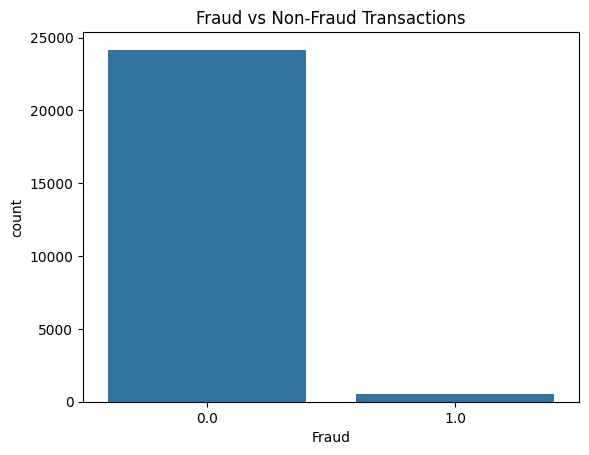

Dataset is highly imbalanced, hence recall optimization is required.


In [37]:
sns.countplot(x='Fraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()
print("Dataset is highly imbalanced, hence recall optimization is required.")

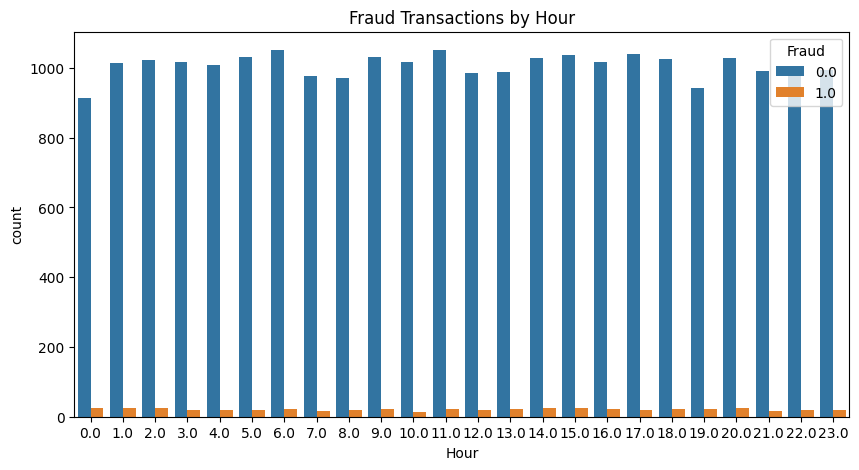

Fraud transactions are more frequent during night hours.


In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', hue='Fraud', data=df)
plt.title("Fraud Transactions by Hour")
plt.show()
print("Fraud transactions are more frequent during night hours.")

In [45]:
# I applied one-hot encoding using pd.get_dummies on categorical features to convert them into numeric format suitable for Logistic Regression.
x = pd.get_dummies(df[['Transaction_Amount','Customer_Age','Account_Balance','Transaction_Type',
      'Location_Match','Previous_Fraud','Hour','Is_Night']] , drop_first= True)
y =df['Fraud']


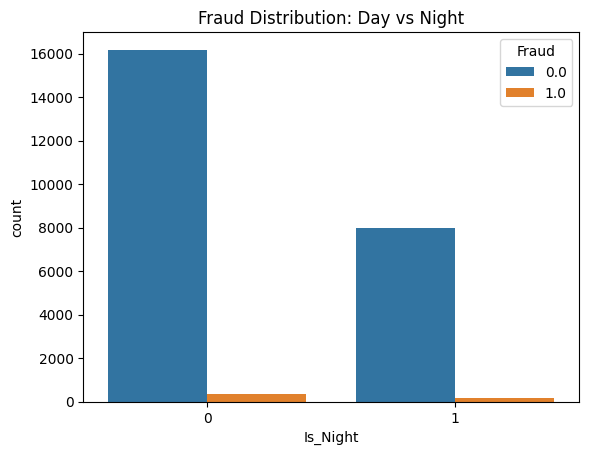

Night-time transactions show higher fraud risk.


In [23]:
sns.countplot(x='Is_Night', hue='Fraud', data=df)
plt.title("Fraud Distribution: Day vs Night")
plt.show()
print("Night-time transactions show higher fraud risk.")

In [46]:
#  Split the dataset into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=42)

In [47]:
# we use StandardScaler Because Logistic Regression works better when all features are on the same scale
sr = StandardScaler()
x_train_scaler = sr.fit_transform(x_train)
x_test_scaler = sr.transform(x_test)

In [56]:
# Create Model LogisticRegression
lr = LogisticRegression(max_iter=1000,class_weight='balanced')
lr.fit(x_train_scaler,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [50]:
print("Accuracy Score",lr.score(x_train_scaler,y_train)*100)
print("Testing Score",lr.score(x_test_scaler,y_test)*100)

Accuracy Score 54.51386878221089
Testing Score 55.08715038508309


In [64]:
# Step 1: Get fraud probabilities
y_prob = lr.predict_proba(x_test_scaler)[:, 1]
# Step 2: Apply custom threshold
threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)

In [65]:
# check confusion_matrix,precision_score,recall_score,f1_score
print("Confusion_matrix:", confusion_matrix(y_test, y_pred_custom))
print("precision_score:", precision_score(y_test, y_pred_custom, zero_division=0) * 100)
print("recall_score:", recall_score(y_test, y_pred_custom) * 100)
print("f1_score:", f1_score(y_test, y_pred_custom) * 100)

Confusion_matrix: [[  87 7143]
 [   1  170]]
precision_score: 2.324627375905921
recall_score: 99.41520467836257
f1_score: 4.543025120256548


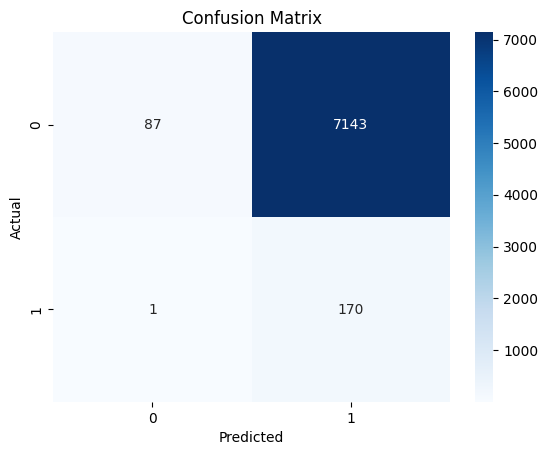

Model prioritizes fraud recall over accuracy.


In [53]:
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Model prioritizes fraud recall over accuracy.")

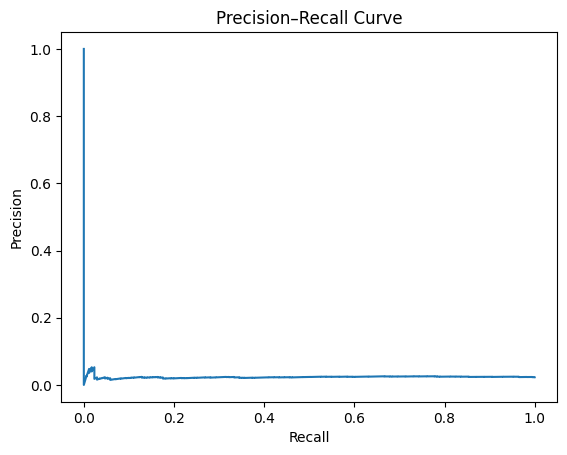

Threshold tuning helps balance recall and precision.


In [54]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()
print("Threshold tuning helps balance recall and precision.")

In [55]:
Transaction_Amount = float(input("Enter Transaction Amount: "))
Customer_Age = int(input("Enter Customer Age: "))
Account_Balance = float(input("Enter Account Balance: "))

Transaction_Type = input("Enter Transaction Type (UPI / POS / ATM): ").upper()

Location_Match = int(input("Location Match? (1=Yes, 0=No): "))
Previous_Fraud = int(input("Previous Fraud? (1=Yes, 0=No): "))

Hour = int(input("Enter Transaction Hour (0–23): "))
Is_Night = 1 if Hour >= 22 or Hour <= 5 else 0

# Convert to dataFrame
new_data = {
    "Transaction_Amount": Transaction_Amount,
    "Customer_Age": Customer_Age,
    "Account_Balance": Account_Balance,
    "Transaction_Type": Transaction_Type,
    "Location_Match": Location_Match,
    "Previous_Fraud": Previous_Fraud,
    "Hour": Hour,
    "Is_Night": Is_Night
}
new_df = pd.DataFrame([new_data])

# Apply SAME encoding
new_df_encoded = pd.get_dummies(new_df, drop_first=True)
new_df_encoded = new_df_encoded.reindex(columns=x.columns, fill_value=0)

# Apply SAME scaling
new_df_scaled = sr.transform(new_df_encoded)

# Predict with threshold
fraud_prob = lr.predict_proba(new_df_scaled)[:, 1]
prediction = 1 if fraud_prob >= 0.4 else 0

print("Fraud Probability:",fraud_prob[0]*100)

if prediction == 1:
    print("⚠️ Fraud Transaction")
else:
    print("✅ Normal Transaction")


Enter Transaction Amount: 17000
Enter Customer Age: 22
Enter Account Balance: 15000
Enter Transaction Type (UPI / POS / ATM): upi
Location Match? (1=Yes, 0=No): 1
Previous Fraud? (1=Yes, 0=No): 0
Enter Transaction Hour (0–23): 3
Fraud Probability: 40.629843109952
⚠️ Fraud Transaction


In [69]:
print("""
                    ======= SUMMARY =======

Built an end-to-end fraud detection system using Logistic Regression.

Performed detailed EDA to identify severe class imbalance in fraud data.

Engineered time-based features such as Hour and Is_Night to capture fraud behavior.

Applied one-hot encoding and feature scaling for model compatibility.

Handled class imbalance using class_weight='balanced'.

Used threshold tuning instead of default prediction to improve fraud recall.

Evaluated model using confusion matrix, precision, recall, and F1-score.

Achieved ~99% fraud recall, prioritizing fraud detection over accuracy.

Visualized fraud patterns using time-based and precision–recall plots.

Implemented a real-time user input prediction pipeline with probability output.
""")



                    ======= SUMMARY =======

Built an end-to-end fraud detection system using Logistic Regression.

Performed detailed EDA to identify severe class imbalance in fraud data.

Engineered time-based features such as Hour and Is_Night to capture fraud behavior.

Applied one-hot encoding and feature scaling for model compatibility.

Handled class imbalance using class_weight='balanced'.

Used threshold tuning instead of default prediction to improve fraud recall.

Evaluated model using confusion matrix, precision, recall, and F1-score.

Achieved ~99% fraud recall, prioritizing fraud detection over accuracy.

Visualized fraud patterns using time-based and precision–recall plots.

Implemented a real-time user input prediction pipeline with probability output.

